## Implementing Resnet and CNN architecture for classifying X ray Images ##

Dataset - Tuberculosis detection

Loading the required packages

In [144]:
import glob
import shutil
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam


Loading the data

In [94]:
normal_images = glob.glob("C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\tb - Lab7\\TB_Chest_Radiography_Database\\Normal\\*")
print(f"Normal Images : {len(list(normal_images))}")

tb_images = glob.glob("C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\tb - Lab7\\TB_Chest_Radiography_Database\\Tuberculosis\\*")
print(f"TB Images : {len(list(tb_images))}")

img_width, img_height = (224,224)


Normal Images : 3500
TB Images : 700


Inference: Loaded the data using glob and displayed the length of both the classes.

Creating directory

In [85]:
train_normal_len = int(len(list(normal_images)) * .8)
train_tb_len = int(len(list(tb_images)) * .8)

Inference: Taking the total no of normal images and tb images and multiplying it with .8 indicates that, we are using 80% of the images for training.

In [86]:
os.makedirs("C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\train")
os.makedirs("C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\train\\Normal")
os.makedirs("C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\train\\Tuberculosis")

Inference: Training directory created.

In [87]:
os.makedirs("C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\validation")
os.makedirs("C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\validation\\Normal")
os.makedirs("C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\validation\\Tuberculosis")

Inference: Validation directory created.

Copying the data using shutil

In [89]:
for i in range(0,train_normal_len):
    shutil.copy(normal_images[i], "C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\train\\Normal")
for i in range (0,train_tb_len):
    shutil.copy(tb_images[i], "C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\train\\Tuberculosis")

Inference: These loops copy a portion of the normal and tb images to their respective training directories, based on the percentage. After executing this loop the training directories will contain a subset of original images.

In [90]:
for i in range(train_normal_len,len(list(normal_images))):
    shutil.copy(normal_images[i],"C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\validation\\Normal")
for i in range(train_tb_len,len(list(tb_images))):
    shutil.copy(tb_images[i], "C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\validation\\Tuberculosis")

Inference: This loop copy a portion of the normal and tb images to their respective validation directories. train_normal_len and train_tb_len (index where the training images end). This ensures that the remaining normal_images and tb_images which were not included in the training set are copied to the validation directory.

In [95]:
batch_size = 32

Data Augmentation

In [92]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

In [93]:
test_datagen = ImageDataGenerator(
    rescale = 1./255.0,
)

Defining training and testing generators

In [96]:
train_generators = train_datagen.flow_from_directory(
    "C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\train",
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'binary',
)

Found 3360 images belonging to 2 classes.


In [97]:
test_generators = test_datagen.flow_from_directory(
    "C:\\Users\\USER\\OneDrive\\Desktop\\Deep Learning\\TB_Chest_DB\\validation",
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'binary',
)

Found 840 images belonging to 2 classes.


Checking class indices

In [100]:
print("Class labels for training data : ", train_generators.class_indices)
print("Class labels for testing data: ", test_generators.class_indices)

Class labels for training data :  {'Normal': 0, 'Tuberculosis': 1}
Class labels for testing data:  {'Normal': 0, 'Tuberculosis': 1}


### Building the CNN Model ###

In [101]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Conv2D(64,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Conv2D(128,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(512,activation ='relu'),
    Dropout(0.5), # prevent overfitting
    Dense(1,activation = 'sigmoid')
])

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [102]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [140]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,918,405 (37.84 MB)

 Trainable params: 3,305,985 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 6,611,972 (25.22 MB)

In [104]:
buildCNN = model.fit(train_generators,validation_data=test_generators,epochs=6)

Epoch 1/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9547 - loss: 0.1667 - val_accuracy: 0.8155 - val_loss: 0.7875
Epoch 2/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.9676 - loss: 0.1161 - val_accuracy: 0.6202 - val_loss: 1.5069
Epoch 3/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9628 - loss: 0.1249 - val_accuracy: 0.1667 - val_loss: 27.8542
Epoch 4/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9594 - loss: 0.1213 - val_accuracy: 0.8869 - val_loss: 0.2479
Epoch 5/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9649 - loss: 0.1191 - val_accuracy: 0.9643 - val_loss: 0.0964
Epoch 6/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9743 - loss: 0.0813 - val_accuracy: 0.7702 - val_loss: 0.6613


Inference: Model achieves high accuracy rate of 97% by the end of training, indicating that it effectively learning the patterns. The validation accuracy varies after each epoch, it suggests that the model may not generalize the unseen data.

Evaluate the Model

In [105]:
evaluateCNN = model.evaluate(test_generators)
evaluateTrainCNN = model.evaluate(train_generators)

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 0.7732 - loss: 0.6049
105/105 ━━━━━━━━━━━━━━━━━━━━ 84s 797ms/step - accuracy: 0.6620 - loss: 0.9024


Inference: In both the cases the accuracy is increasing while the loss is decreasing this is a good sign.

Visualizing training and val loss

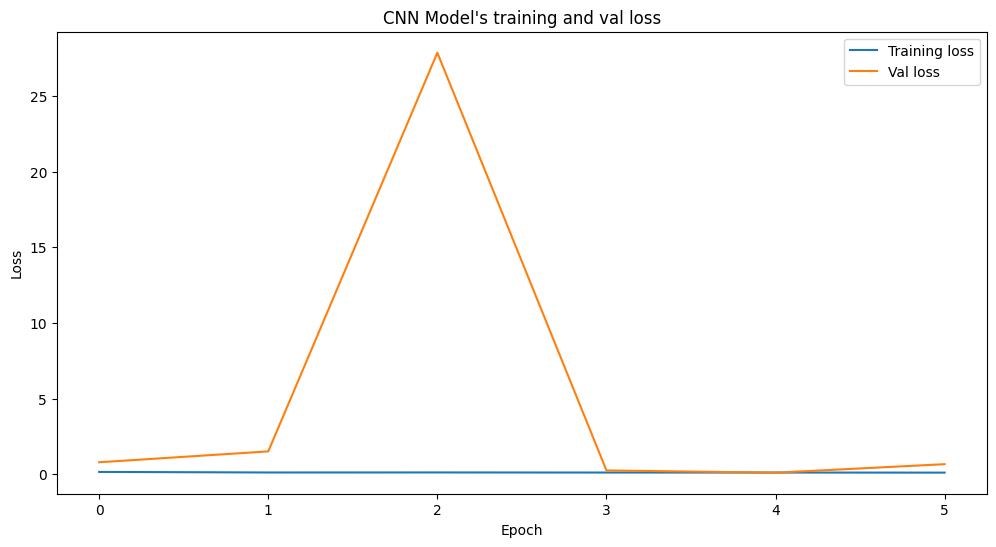

In [108]:
plt.figure(figsize=(12,6))
plt.plot(buildCNN.history['loss'],label="Training loss")
plt.plot(buildCNN.history['val_loss'], label="Val loss")
plt.title("CNN Model's training and val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

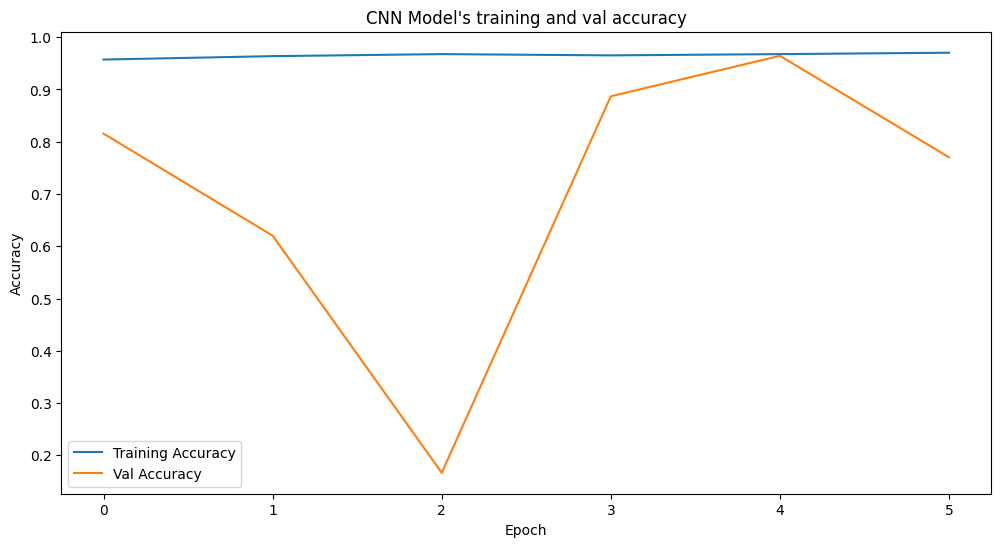

In [109]:
plt.figure(figsize=(12,6))
plt.plot(buildCNN.history['accuracy'],label="Training Accuracy")
plt.plot(buildCNN.history['val_accuracy'], label="Val Accuracy")
plt.title("CNN Model's training and val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Time to make predictions

In [110]:
model.save('cnnModel.h5')

In [126]:
cnnModel = load_model('cnnModel.h5')

In [135]:
imgPath = "C:\\Users\\USER\\OneDrive\\Desktop\\tb.jpeg"
randomImg = imgPath

In [136]:
img = image.load_img(randomImg,target_size = (224,224,3))
customcnn = image.img_to_array(img)/255.0 # norm
customcnn = np.expand_dims(customcnn, axis = 0)

In [137]:
predictions = cnnModel.predict(customcnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [139]:
if predictions > 0.5:
    print("Predicted Class: Tuberculosis")
else:
    print("Predicted Class: Normal")

Predicted Class: Tuberculosis


Inference: The model predicted the given random tb image as tb image. That's a great sign. CNN model is performing well, it predicted the random 

### Building ResNet Architecture ###

In [157]:
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [158]:
# freezing the top layers for classification
for layer in base_model.layers:
    layer.trainable = False

In [159]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(1024, activation = 'relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')  
])


In [160]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [163]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,885,317 (114.00 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,198,404 (16.02 MB)

In [164]:
model.fit(train_generators,validation_data= test_generators,epochs = 6)

Epoch 1/6


105/105 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.8094 - loss: 0.5628 - val_accuracy: 0.8333 - val_loss: 0.4860
Epoch 2/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.8232 - loss: 0.5078 - val_accuracy: 0.8333 - val_loss: 0.5053
Epoch 3/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.8233 - loss: 0.4900 - val_accuracy: 0.8333 - val_loss: 0.4595
Epoch 4/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.8334 - loss: 0.4670 - val_accuracy: 0.8333 - val_loss: 0.4665
Epoch 5/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 366s 3s/step - accuracy: 0.8328 - loss: 0.4661 - val_accuracy: 0.8333 - val_loss: 0.4810
Epoch 6/6
105/105 ━━━━━━━━━━━━━━━━━━━━ 754s 7s/step - accuracy: 0.8311 - loss: 0.4551 - val_accuracy: 0.8333 - val_loss: 0.4618


Inference: The ResNet50 model is showing a positive sign, training accuracy is increasing meanwhile loss is decreasing. And validation loss is also decreasing gradually.

Evaluate the Model

In [165]:
evaluateResNet = model.evaluate(test_generators)

27/27 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8237 - loss: 0.4729


Inference: The ResNet50 model is giving good test accuracy, it is performing well on unseen data. Validation loss is also pretty good.

Conclusion

Thus the task to implement CNN and ResNet50 architecture for classifying X Ray Images has been implemented sucessfully. For this dataset Resnet50 architecture is performing good when comparing to CNN.
